# How To Use The COSIMA Cookbook

This notebook is designed to help new users get to grips with the COSIMA Cookbook. It assumes that:
 * You have cloned the cosima-cookbook git repository to a location that can see the COSIMA storage space on [NCI](http://cosima-cookbook.readthedocs.io/en/latest/nci.org.au) (/g/data3/hh5/tmp/cosima). We recommend the [Virtual Desktop Infrastructure (VDI)](http://nci.org.au/services/vdi/).
 * You have access to a python3 distribution with the required packages.
 * You have installed the cosima-cookbook package (via `pip install --user -e`).
 * You can fire up a Jupyter notebook!

**Before starting,** load in some libraries that you are likely to need:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In addition, you **always** need to load the cosima_cookbook module. This provides a bunch of functions that you will use:

In [2]:
import cosima_cookbook as cc

netcdf_index loaded.


## 1. The Cookbook Philosophy
The COSIMA Cookbook is a framework for analysing ocean-sea ice model output.
It is designed to:
* Provide a library of commonly used diagnostics;
* Write efficient, well-documented, openly accessible code;
* Encourage community input to the code;
* Ensure diagnostic results are reproducible;
* Find methods to deal with the memory limitations of analysing high-resolution model output.


### 1.1 A database of experiments
The database is created and maintained by a function called `build_index`, which stores simulation data in this directory hierachy:
* **configuration** Model resolution (1$^\circ$, 0.25$^\circ$ or 0.1$^\circ$) and submodels (MOM5-SIS1, ACCESS-OM2, etc) 
* **experiment** Individual simulations, usually with multiple output directories
* **netcdf files** Stored inside output directories

The database is shared with other users. You shouldn't need to invoke `build_index` unless you have recently run some new experiments, but if you do need it just use:

In [10]:
cc.build_index()

Files found but not yet indexed: 0
No new .nc files found.


True

### 1.2 Inbuilt Database Functions

We have constructed a few functions to help you operate the cookbook and to access the datasets. These functions all sit in the `cosima_cookbook` directory. For example, `netcdf_index.py` contains the above `build_index` function as well as a series of functions that are built to query the SQL database.

`get_configuration` returns a list of all model configurations that are saved into the database. 

In [11]:
cc.get_configurations()

['mom01v5',
 'APE-MOM',
 'access-om2',
 'mom025',
 'mom-sis',
 'access-om2-025',
 'access-om2-01',
 'woa13',
 'kds75_wp2']

`get_experiments` lists all of the experiments that are catalogued for a given configuration. These function needs one of the above configurations as an input.

In [5]:
cc.get_experiments('access-om2')

['1deg_core_nyf_spinup_A',
 '1deg_jra55_ryf0304_gfdl50',
 '1deg_jra55_ryf0304_kds100_RCP45',
 '1deg_jra55_ryf0304_kds100_s6_RCP45',
 '1deg_jra55_ryf0304_kds100_s6_mushy',
 '1deg_jra55_ryf0304_kds100_sss12',
 '1deg_jra55_ryf0304_kds50_RCP45',
 '1deg_jra55_ryf0304_kds50_s13p8_RCP45',
 '1deg_jra55_ryf0304_kds50_s13p8_mushy',
 '1deg_jra55_ryf0304_kds50_sss12',
 '1deg_jra55_ryf0304_kds75_sss12',
 '1deg_jra55_ryf03_kds50',
 '1deg_jra55_ryf04_kds50',
 '1deg_jra55_ryf8485_gfdl50',
 '1deg_jra55_ryf8485_kds100_RCP45',
 '1deg_jra55_ryf8485_kds100_s6_RCP45',
 '1deg_jra55_ryf8485_kds100_s6_mushy',
 '1deg_jra55_ryf8485_kds100_sss12',
 '1deg_jra55_ryf8485_kds50_RCP45',
 '1deg_jra55_ryf8485_kds50_s13p8_RCP45',
 '1deg_jra55_ryf8485_kds50_s13p8_mushy',
 '1deg_jra55_ryf8485_kds50_sss12',
 '1deg_jra55_ryf8485_kds75_sss12',
 '1deg_jra55_ryf8485_spinup1',
 '1deg_jra55_ryf8485_spinup2',
 '1deg_jra55_ryf84_kds50',
 '1deg_jra55_ryf85_kds50',
 '1deg_jra55_ryf9091_gfdl50',
 '1deg_jra55_ryf9091_gfdl50_mdsr',
 '1d

`get_ncfiles` provides a list of all the netcdf filenames saved for a given experiment. Note that each of these filenames are present in some or all of the output directories.

In [6]:
cc.get_ncfiles('025deg_jra55v13_ryf8485_spinup_A')

['rmp_jra55_runoff_cice_conserve.nc',
 'rmp_jrar_to_cict_CONSERV.nc',
 'rmp_jra55_cice_smooth.nc',
 'i2a.nc',
 'a2i.nc',
 'rmp_jra55_cice_conserve.nc',
 'ocean.nc',
 'ocean_scalar.nc',
 'o2i.nc',
 'ocean_grid.nc',
 'ocean_month.nc',
 'iceh.\\d+-\\d+.nc']

And finally, `get_variables` provides a list of all the variables available in a specific netcdf file. This functions requires both the experiment and the filename to be provided.

In [7]:
cc.get_variables('025deg_jra55v13_ryf8485_spinup_A','ocean_month.nc')

['xt_ocean',
 'yt_ocean',
 'time',
 'nv',
 'xu_ocean',
 'yu_ocean',
 'sea_level',
 'eta_t',
 'sea_levelsq',
 'mld',
 'surface_temp',
 'surface_salt',
 'pme_river',
 'pme_net',
 'river',
 'runoff',
 'evap',
 'melt',
 'sfc_salt_flux_restore',
 'sfc_salt_flux_ice',
 'sfc_salt_flux_coupler',
 'net_sfc_heating',
 'fprec',
 'lprec',
 'wfimelt',
 'wfiform',
 'tau_x',
 'tau_y',
 'bmf_u',
 'bmf_v',
 'tx_trans_int_z',
 'ty_trans_int_z',
 'pbot_t',
 'average_T1',
 'average_T2',
 'average_DT',
 'time_bounds']

### 1.3 Loading data from a netcdf file

Python has many ways of reading in data from a netcdf file ... so we thought we would add another way. This is achieved in the `get_nc_variable` function, which is the most commonly used function in the cookbook. This function queries the database to find a variable from a specific file, from a specific variable, and loads some or all of that file. We will now take a little while to get to know this function. In it's simplest form, you need just three arguments: expt, ncfile and variable. 

You can see all the available options using the inbuilt help function, which brings up the function documentation.

In [8]:
help(cc.get_nc_variable)

Help on function get_nc_variable in module cosima_cookbook.netcdf_index:

get_nc_variable(expt, ncfile, variable, chunks={}, n=None, op=None, time_units='days since 1900-01-01', use_bag=False)
    For a given experiment, concatenate together
    variable over all time given a basename ncfile.
    
    Since some NetCDF4 files have trailing integers (e.g. ocean_123_456.nc)
    ncfile can use glob syntax http://www.sqlitetutorial.net/sqlite-glob/
    and regular expressions also work in some limited cases.
    
    By default, xarray is set to use the same chunking pattern that is
    stored in the ncfile. This can be overwritten by passing in a dictionary
    chunks or setting chunks=None for no chunking (load directly into memory).
    
    n > 0 means only use the last n ncfiles files. Useful for testing.
    
    op() is function to apply to each variable before concatenating.
    
    time_units (e.g. "days since 1600-01-01") can be used to override
    the original time.units.  If 

You may like to note a few things about this function:
1. The data is returned as an xarray DataArray, which includes the coordinate and attribute information from the netcdf file (more on xarray later). 
2. The variable time does not start at zero (like the netcdf file) - we generally shift it to be in a data range that allows us to use `pandas` time series and date functionality.
3. By default, we load the whole dataset, but we could just load the last `n` netcdf files (useful for testing).
4. Other customisable options include setting the variable chunking and incorporating a function to operate on the data.

In [9]:
cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A',\
                   'ocean_scalar.nc','temp_global_ave')

HBox(children=(IntProgress(value=0, description='get_nc_variable:: '), HTML(value='')))

<xarray.DataArray 'temp_global_ave' (time: 2328, scalar_axis: 1)>
dask.array<shape=(2328, 1), dtype=float64, chunksize=(1, 1)>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) datetime64[ns] 1900-01-16T12:00:00 1900-02-15 ...
Attributes:
    long_name:      Global mean temp in liquid seawater
    units:          deg_C
    valid_range:    [  -10.  1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

In [13]:
cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A',\
                   'ocean_scalar.nc','temp_global_ave',chunks={'time':10})

HBox(children=(IntProgress(value=0, description='get_nc_variable:: '), HTML(value='')))

<xarray.DataArray 'temp_global_ave' (time: 2328, scalar_axis: 1)>
dask.array<shape=(2328, 1), dtype=float64, chunksize=(10, 1)>
Coordinates:
  * scalar_axis  (scalar_axis) float64 0.0
  * time         (time) datetime64[ns] 1900-01-16T12:00:00 1900-02-15 ...
Attributes:
    long_name:      Global mean temp in liquid seawater
    units:          deg_C
    valid_range:    [  -10.  1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature

### 1.4 Exercises
OK, this is a tutorial, so now you have to do some work. Your tasks are to:
* Find and load SSH from an experiment (an experiment ... perhaps a 1° configuration would be best).

In [16]:
eta_t = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A',\
                   'ocean_month.nc','eta_t')
eta_t.mean('time').plot()

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=99), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

* Just load the last 10 files from an experiment (any variable you like).

* Load potential temperature from an experiment (again, 1° would be quickest). Can you chunk the data differently from the default?

## 2. How to manipulate and plot variables with xarray
We use the python package `xarray` (which is built on `dask`, `pandas`, `matplotlib` and `numpy`) for many of our diagnostics. `xarray` has a a lot of nice features, some of which we will try to demonstrate for you. 

### 2.1 Plotting
`xarray`'s `.plot()` method does its best to figure out what you are trying to plot, and plotting it for you. Let's start by loading a 1-dimensional variable and plotting.

HBox(children=(IntProgress(value=0, description='get_nc_variable:: '), HTML(value='')))

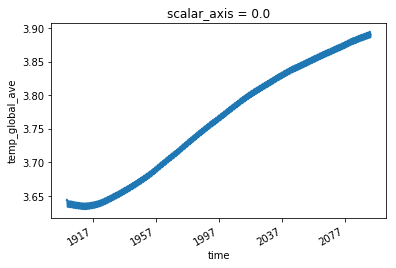

In [15]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean_scalar.nc','temp_global_ave')
darray.plot()

You should see that `xarray` has figured out that this data is a timeseries, that the x-axis is representing time and that the y-axis is `temp_global_ave`. You can always modify aspects of your plot if you are unhappy with the default xarray behaviour:

In [ ]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean_scalar.nc','temp_global_ave')
darray.plot()
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Globally Averaged Temperature')

Because `xarray` knows about dimensions, it has plotting routines which can figure out what it shold plot. For example, 

In [ ]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean_month.nc','surface_temp',n=1)
darray.mean('time').plot()

Again, you can customise this plot as you see fit:

In [ ]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean_month.nc','surface_temp',n=1)
darray = darray - 273.15 # convert from Kelvin to Celsius
darray.mean('time').plot.contourf(levels=np.arange(-2,32,2),cmap=cm.cm.thermal)
plt.ylabel('latitude')
plt.xlabel('longitude')

### 2.2 Slicing and dicing

There are two different ways of subselecting from a DataArray: `isel` and `sel`. The first of these is probably what you are used to -- you specify the value of the index of the array. In the second case you specify the value of the coordinate you want to select. These two methods are demonstrated in the following example:

In [ ]:
darray = cc.get_nc_variable('1deg_jra55_ryf9091_kds50','ocean.nc','pot_rho_2',time_units='days since 1700-01-01')
surface_density = darray.isel(time=400).sel(st_ocean=1000,method='nearest')
surface_density.plot()

In the above example, a 450-year dataset is loaded. We then use `isel` to select the 401st year (time=400) and use `sel` to select a z level that is about 1000m deep. The `sel` method is very flexible, allowing us to use similar code in differing model resolutions or grids. In addition, both methods allow you to slice a range of values:

In [ ]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean.nc','v',time_units='days since 1700-01-01')
v = darray.isel(time=100).sel(st_ocean=50,method='nearest')\
            .sel(yu_ocean=slice(-50,-20)).sel(xu_ocean=slice(-230,-180)).load()
v.plot()

Here we have taken meridional velocity, and sliced out a small region of interest for our plot. Note the `load()` method, which tells `xarray` to do the calculation (otherwise `xarray` aims to defer calculations until the variable is needed).

### 2.3 Averaging along dimensions

We often perform operations such as averaging on dataarrays. Again, knowledge of the coordinates can be a big help here, as you can instruct the `mean()` method to operate along given coordinates. The case below takes a temporal and zonal average of potential density. (To be precise, it is actually a mean in the i grid direction, which is only zonal outside the tripolar region in the Arctic, i.e. south of 65N in the ACCESS-OM2 models.)

In [ ]:
darray = cc.get_nc_variable('1deg_jra55_ryf9091_kds50','ocean.nc','pot_rho_2',n=10,time_units='days since 1700-01-01')
darray.mean('time').mean('xt_ocean').plot(cmap=cm.cm.haline)
plt.gca().invert_yaxis()

### 2.4 Resampling

`xarray` uses `pandas datetime` conventions to allow for operations such as resampling in time. This resampling is simple and powerful but it has a major drawback: it only works for dates between about 1620 and 2400. Frankly, this limitation really sucks -- it prevents us from analysis simulations for longer than ~700 years, and means we need to set a date of 1700 (where ocean-sea ice models usually start from zero). Anyway, we still use it, and here is an example of re-plotting the figure from 2.1 with annual averaging:

HBox(children=(IntProgress(value=0, description='get_nc_variable:: '), HTML(value='')))

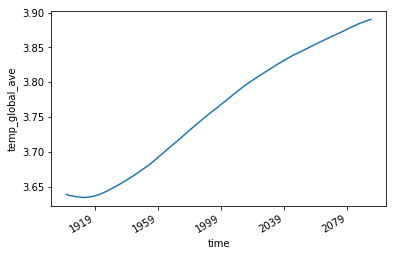

In [4]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean_scalar.nc','temp_global_ave')
meandata = darray.resample(time='A').mean()
meandata.plot()

In [5]:
dir(cc)

['IPython',
 'Markdown',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'aabw',
 'amoc',
 'amoc_south',
 'annual_scalar',
 'bering_strait',
 'build_index',
 'cc',
 'compute_by_block',
 'diagnostics',
 'display',
 'distributed',
 'drake_passage',
 'f90nml',
 'get_configurations',
 'get_experiments',
 'get_nc_variable',
 'get_ncfiles',
 'get_variables',
 'lineplots',
 'maps',
 'mean_tau_x',
 'memory',
 'mixed_layer_depth',
 'netcdf_index',
 'nml_diff',
 'nml_summary',
 'nmldict',
 'nmldiff',
 'np',
 'os',
 'overturning',
 'plots',
 'plt',
 'psi_avg',
 'sea_surface_salinity',
 'sea_surface_temperature',
 'start_cluster',
 'summary',
 'summary_md',
 'superset',
 'tqdm_notebook',
 'wind_stress',
 'zonal_mean']

### 2.5 Exercises

 * Pick an experiment and plot a map of the temperature of the upper 100m of the ocean for one year.

In [7]:
help(cc.start_cluster)

Help on function start_cluster in module cosima_cookbook.distributed:

start_cluster(diagnostics_port=0)
    Set up a LocalCluster for distributed



 * Now, take the same experiment and construct a timeseries of spatially averaged (regional or global) upper 700m temperature, resampled every 3 years.

## 3. More Advanced Stuff

### 3.1 Making a map with cartopy

In [ ]:
darray = cc.get_nc_variable('025deg_jra55v13_ryf8485_spinup_A','ocean.nc','temp',n=1,time_units='days since 1700-01-01')
temp = darray.mean('time').sel(st_ocean=50,method='nearest').sel(xt_ocean=slice(-90,30)) - 273.15
plt.figure(figsize=(4,4))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),x='xt_ocean', y='yt_ocean',cmap=cm.cm.thermal,vmin=-2,vmax=30)
ax.coastlines()

### 3.2 Functionising

When you have a polished and working code that you think may be commmonly used, you can add it to our list of inbuilt functions. By way of example, we have a function called annual_scalar, which effectively performs  the operation performed in 2.4 (reading in a scalar and annually averaging), but for multiple experiments and multiple variables. You can invoke it as follows:

In [ ]:
expts=['025deg_jra55v13_ryf8485_spinup_A','025deg_jra55v13_ryf8485_KDS75']
var = ['temp_global_ave']
cc.plots.annual_scalar(expts,var)

To follow the logic of this function, look in cosima-cookbook/cosima_cookbook/plots/lineplots.py for the function annual_scalar. Note that this function also calls another function called annual_scalar in cosima-cookbook/cosima_cookbook/diagnostics/simple.py.

### 3.3 Distributed computing

You may notice that some of our scripts call the `start_cluster()` function. This can be found in `distributed.py`. It sets up a local cluster on your node for distributed computation. 

In [8]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 46022:127.0.0.1:46022 vdi-n23.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:36421 Dashboard: http://127.0.0.1:46022,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


The dashboard link should allow you to access information on how your work is distributed between the cores on your local cluster (but, just quietly, I haven't been very successful in getting this to work).

### 3.5 Sandbox exercises

For the remainder of the tutorial, please dream up a new diagnostic that you want to compute, and try to make the computation using cookbook functions.